**Task 6: K-Nearest Neighbors (KNN) Classification**

** 1. Choose a classification dataset and normalize features**

In [1]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv('/content/Iris.csv')

In [3]:
# Drop unnecessary columns
df = df.drop(columns=['Id'])

In [4]:
# Encode the target labels (Species)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [5]:
# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

In [6]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Check shape
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


** 2.Use KNeighborsClassifier from sklearn**

In [9]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
# 1. Initialize the KNN classifier (default K=5)
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [11]:
# 2. Fit the classifier on training data
knn_uniform.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
# 3. Predict on test data
y_pred_uniform = knn_uniform.predict(X_test)

In [13]:
# 4. Display first few predicted vs actual labels
print("\nPredicted vs Actual (first 5):")
for actual, pred in zip(y_test[:5], y_pred_uniform[:5]):
    print(f"Actual: {actual}, Predicted: {pred}")


Predicted vs Actual (first 5):
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0


In [14]:
# 5. Print model parameters
print("\nModel Parameters:")
print("Number of neighbors:", knn_uniform.n_neighbors)
print("Weighting method:", knn_uniform.weights)
print("Metric:", knn_uniform.metric)


Model Parameters:
Number of neighbors: 5
Weighting method: uniform
Metric: minkowski


In [15]:
# 6. Try distance-based weighting
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

# Compare accuracy
acc_uniform = accuracy_score(y_test, y_pred_uniform)
acc_distance = accuracy_score(y_test, y_pred_distance)

print(f"\nAccuracy (uniform weights): {acc_uniform:.2f}")
print(f"Accuracy (distance weights): {acc_distance:.2f}")



Accuracy (uniform weights): 0.93
Accuracy (distance weights): 0.97


In [16]:
# 7. Optional: Save the trained model using joblib
import joblib
joblib.dump(knn_uniform, 'knn_uniform_model.pkl')
joblib.dump(knn_distance, 'knn_distance_model.pkl')
print("\nModels saved successfully as 'knn_uniform_model.pkl' and 'knn_distance_model.pkl'")


Models saved successfully as 'knn_uniform_model.pkl' and 'knn_distance_model.pkl'


**Experiment with different values of K**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [22]:
# 1. Loop over K = 1 to 20
k_range = range(1, 21)
train_accuracies = []
test_accuracies = []
cv_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # 2. Train & evaluate
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Calculate cross-validation score
    cv_score = cross_val_score(model, X_scaled, y, cv=5)  # Using 5-fold cross-validation
    cv_scores.append(cv_score.mean())

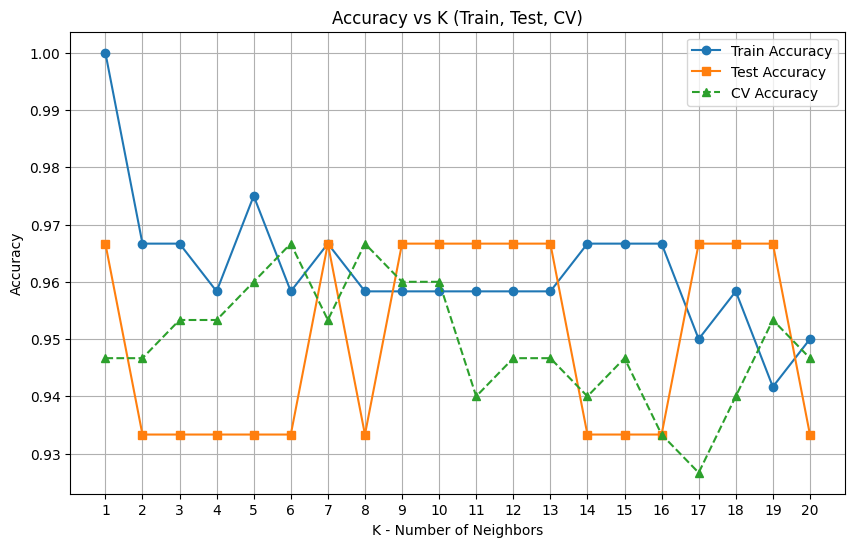

In [23]:
# 3. Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='s')
plt.plot(k_range, cv_scores, label='CV Accuracy', marker='^', linestyle='--')
plt.title('Accuracy vs K (Train, Test, CV)')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# 4. Best K from CV
best_k = k_range[np.argmax(cv_scores)]
print(f"\n✅ Best K based on cross-validation: {best_k}")
print(f"Corresponding CV Accuracy: {max(cv_scores):.2f}")


✅ Best K based on cross-validation: 6
Corresponding CV Accuracy: 0.97


In [25]:
# 5. Compare bias-variance (optional print)
print("\n📊 Bias-Variance Insight (Train vs Test Accuracy):")
for k in [1, best_k, 20]:
    print(f"K={k}: Train Acc = {train_accuracies[k-1]:.2f}, Test Acc = {test_accuracies[k-1]:.2f}")



📊 Bias-Variance Insight (Train vs Test Accuracy):
K=1: Train Acc = 1.00, Test Acc = 0.97
K=6: Train Acc = 0.96, Test Acc = 0.93
K=20: Train Acc = 0.95, Test Acc = 0.93


In [27]:
# 7. Train final model with best K and show confusion matrix
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

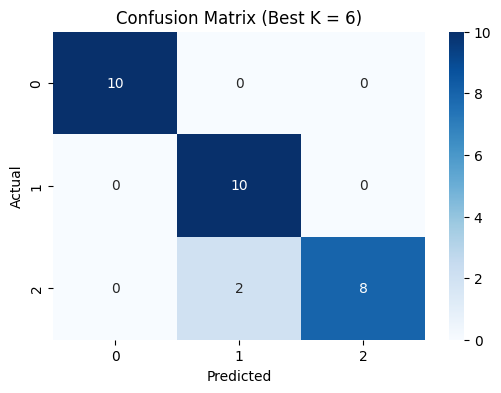

In [28]:
# 7. Confusion Matrix for best K
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix (Best K = {best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**KNN Decision Boundary Visualization with PCA**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.lines import Line2D


In [31]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)
X_total_2D = np.vstack((X_train_2D, X_test_2D))

y_total = np.hstack((y_train, y_test))


In [32]:
# Train KNN on 2D data
k = 6  # use best K
knn_2D = KNeighborsClassifier(n_neighbors=k)
knn_2D.fit(X_train_2D, y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
# Meshgrid for decision boundary
h = 0.02
x_min, x_max = X_total_2D[:, 0].min() - 1, X_total_2D[:, 0].max() + 1
y_min, y_max = X_total_2D[:, 1].min() - 1, X_total_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

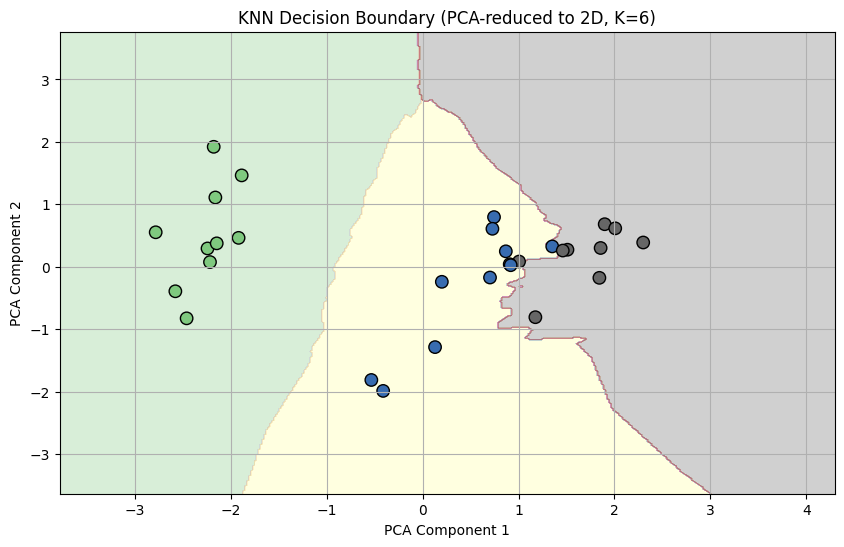

In [35]:
# Plot decision boundary with test points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")
scatter = plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap="Accent", edgecolor="k", s=80)

plt.title(f"KNN Decision Boundary (PCA-reduced to 2D, K={k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

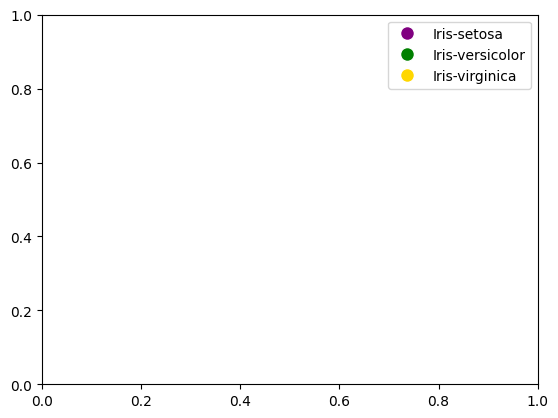

In [37]:
# Manual legend for class labels
legend_elements = [
    Line2D([0], [0], marker="o", color="w", label=label_encoder.classes_[0], markerfacecolor="purple", markersize=10),
    Line2D([0], [0], marker="o", color="w", label=label_encoder.classes_[1], markerfacecolor="green", markersize=10),
    Line2D([0], [0], marker="o", color="w", label=label_encoder.classes_[2], markerfacecolor="gold", markersize=10),
]
plt.legend(handles=legend_elements)

plt.show()

**Plot Confusion Matrix Heatmap**

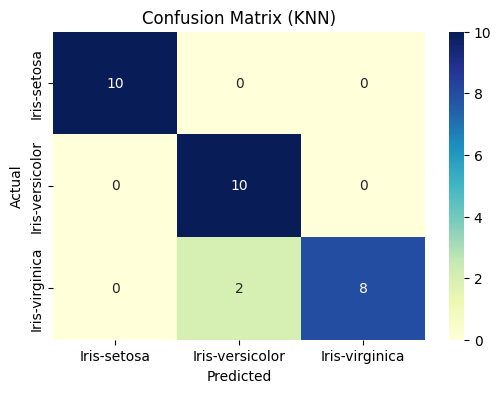

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Classification Report (Precision, Recall, F1)**

In [41]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



**Plot ROC Curve (Binary: Versicolor vs Virginica)**

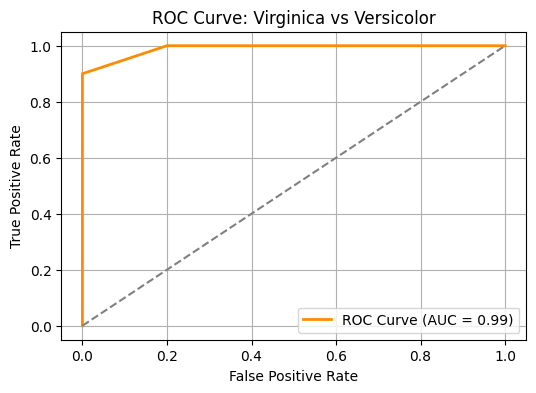

In [43]:
from sklearn.metrics import roc_curve, auc

# Filter to binary: versicolor (1) and virginica (2)
mask = y_test.isin([1, 2])
X_bin = X_test[mask]
y_bin = y_test[mask]

# Predict probabilities
probs = best_model.predict_proba(X_bin)
# Class '2' is virginica → make binary: virginica = 1, versicolor = 0
y_true_bin = (y_bin == 2).astype(int)
y_scores = probs[:, 2]  # Probabilities for class 2

# Compute ROC
fpr, tpr, _ = roc_curve(y_true_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve: Virginica vs Versicolor')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Feature Importance via Permutation (for KNN)**

/tmp/ipython-input-46-763747011.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm')


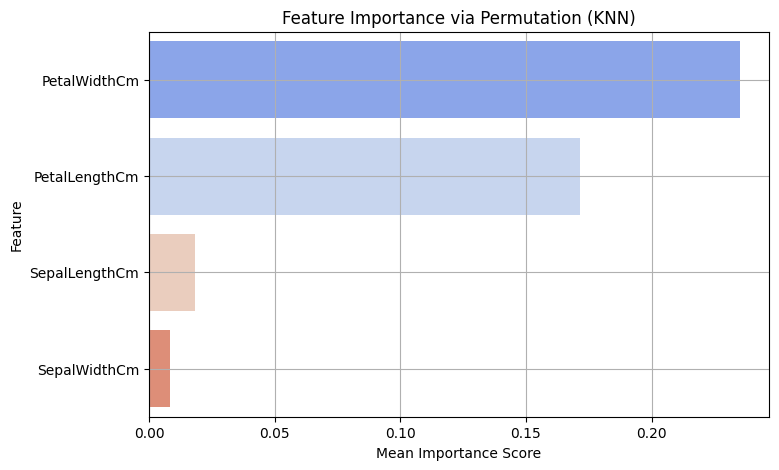

In [46]:
# Feature Importance using PermutationImportance (for KNN)

from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=42)

# Create dataframe for easier plotting
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm')
plt.title('Feature Importance via Permutation (KNN)')
plt.xlabel('Mean Importance Score')
plt.grid(True)
plt.show()

**Decision Boundaries Using All Feature Pairs:**

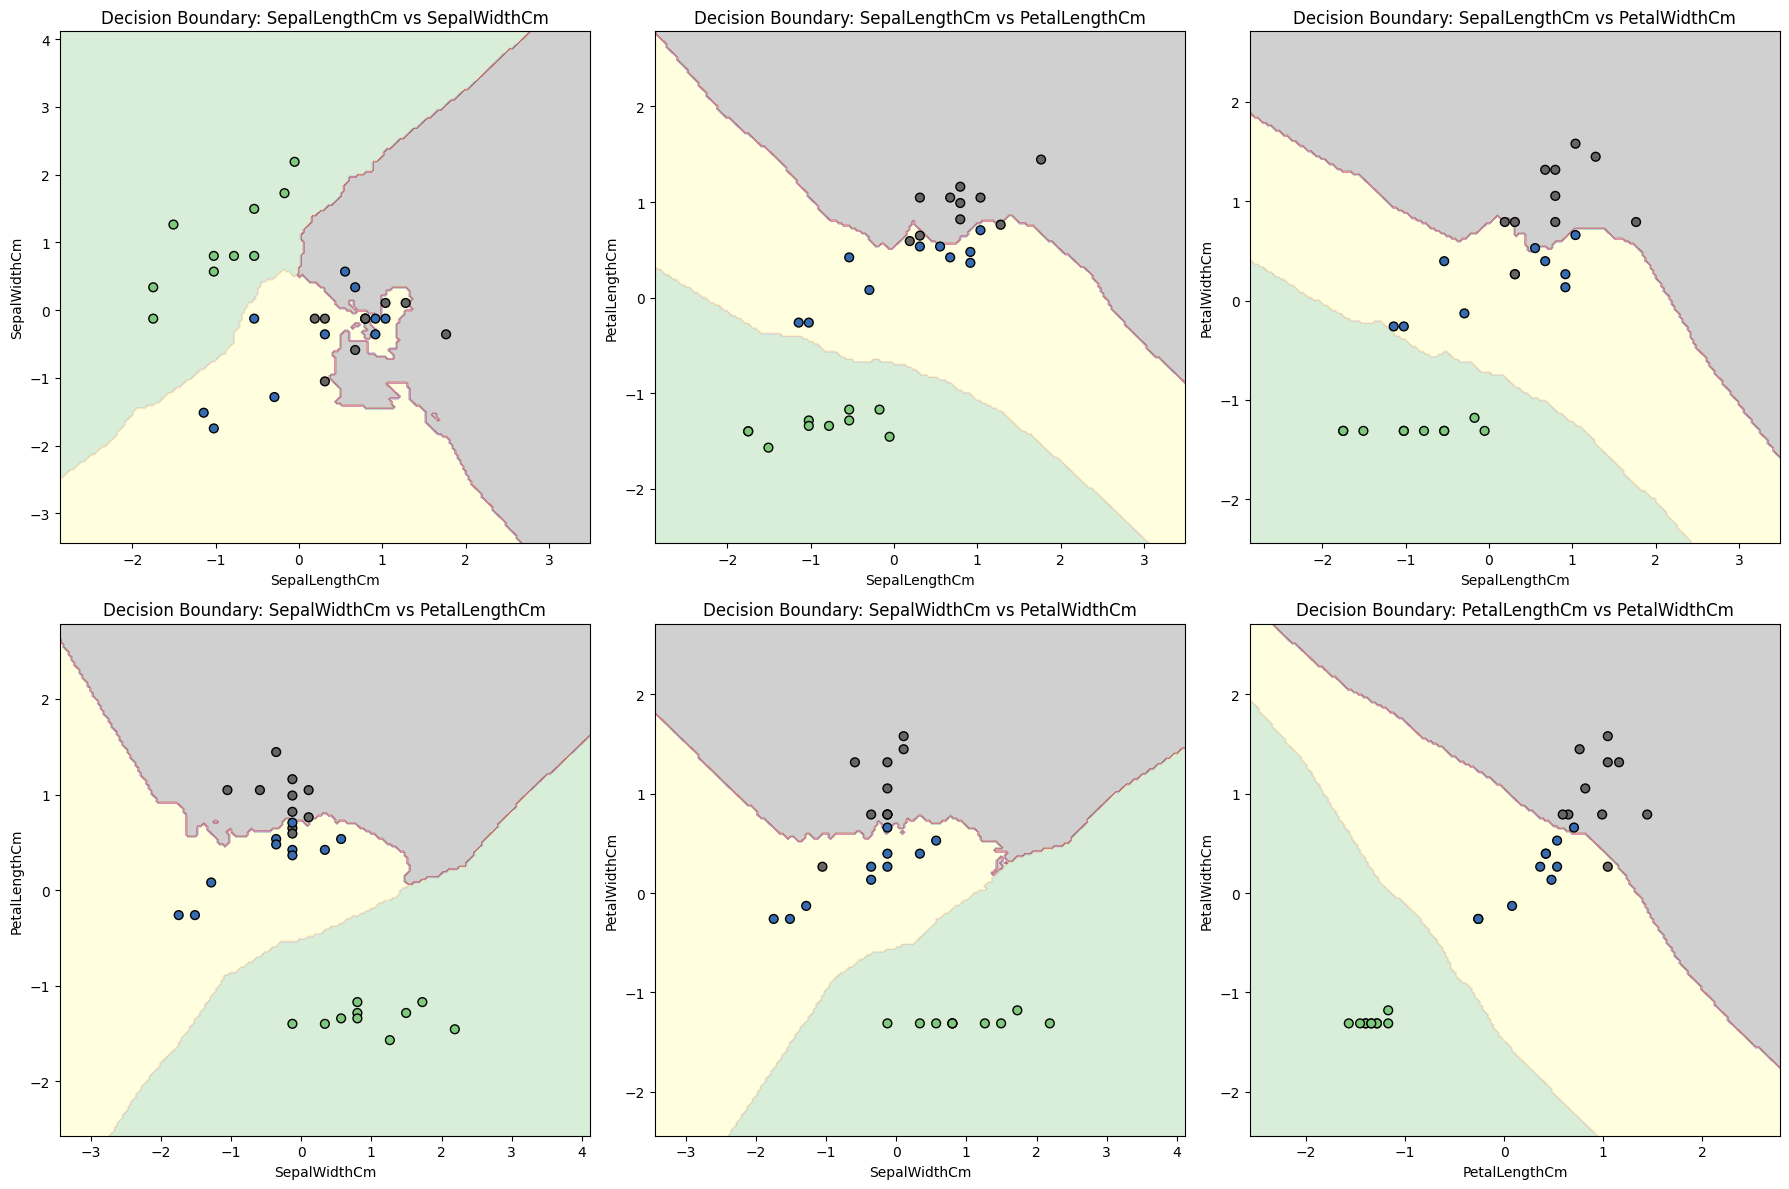

In [47]:
# New Step: 6.4 — Visualize decision boundaries using all pairs of features (no PCA)

from itertools import combinations

# Create all pairs of features (for 4 features total: 6 combinations)
feature_names = X.columns
feature_pairs = list(combinations(range(X.shape[1]), 2))

plt.figure(figsize=(18, 12))

for i, (f1, f2) in enumerate(feature_pairs):
    # Extract only the two features
    X_pair = X_scaled[:, [f1, f2]]

    # Train/test split for this pair
    X_pair_train, X_pair_test, y_pair_train, y_pair_test = train_test_split(
        X_pair, y, test_size=0.2, random_state=42, stratify=y)

    # Train KNN
    knn_pair = KNeighborsClassifier(n_neighbors=best_k)
    knn_pair.fit(X_pair_train, y_pair_train)

    # Meshgrid
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = knn_pair.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
    plt.scatter(X_pair_test[:, 0], X_pair_test[:, 1], c=y_pair_test, cmap='Accent', edgecolor='k', s=40)
    plt.xlabel(feature_names[f1])
    plt.ylabel(feature_names[f2])
    plt.title(f'Decision Boundary: {feature_names[f1]} vs {feature_names[f2]}')

plt.tight_layout()
plt.show()


**Learning Curve Plotted:**

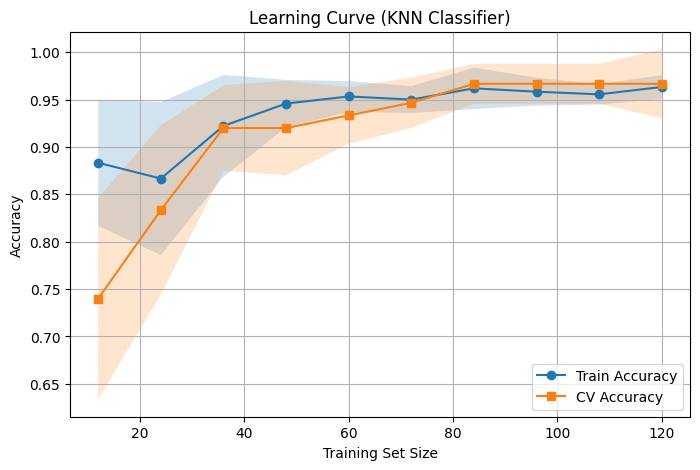

In [48]:
# New Step 6.5 — Learning Curve: Visualize performance as training size increases

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=best_k),
    X=X_scaled,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# Compute mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train Accuracy", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="CV Accuracy", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve (KNN Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()
